<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [1]:
from apps.lib import Sensor, Performance, Model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

WHO = 7
SONG = 2
TRAIN_ORDER = 3

In [2]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
sensor_data = Sensor(verbose=1)

13:54:20 INFO << load arm CSV.
13:54:20 INFO << load drummer CSV.


In [4]:
def gogo(who_id, song_id, train_pf_order):
    train_pf = Performance(sensor_data, who_id, song_id, train_pf_order, 4, 4)
    
    pfs = []
    for pf_order in tqdm(range(1, 3 + 1)):
        if pf_order == train_pf_order:
            pfs.append(train_pf)
        else:
            pfs.append(Performance(sensor_data, who_id, song_id, pf_order, 4, 4)) 
            
    return pfs

In [5]:
pfs = gogo(WHO, SONG, TRAIN_ORDER)

100%|██████████| 3/3 [01:06<00:00, 22.17s/it]


13:55:59 DEBUG << findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/usr/bin/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
13:55:59 DEBUG << findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/usr/bin/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


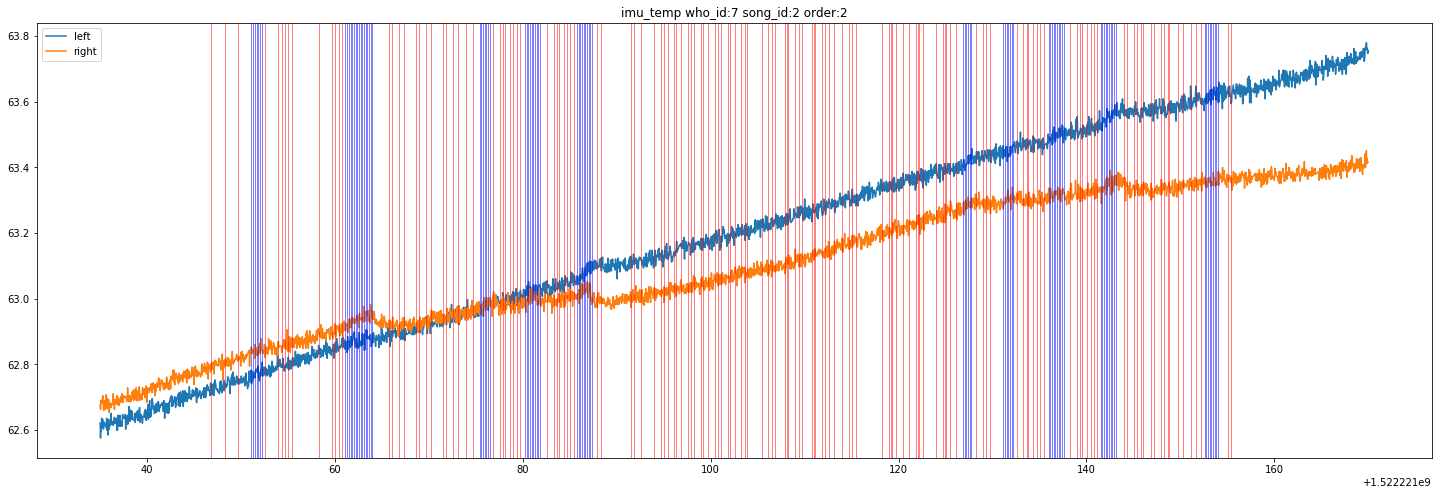

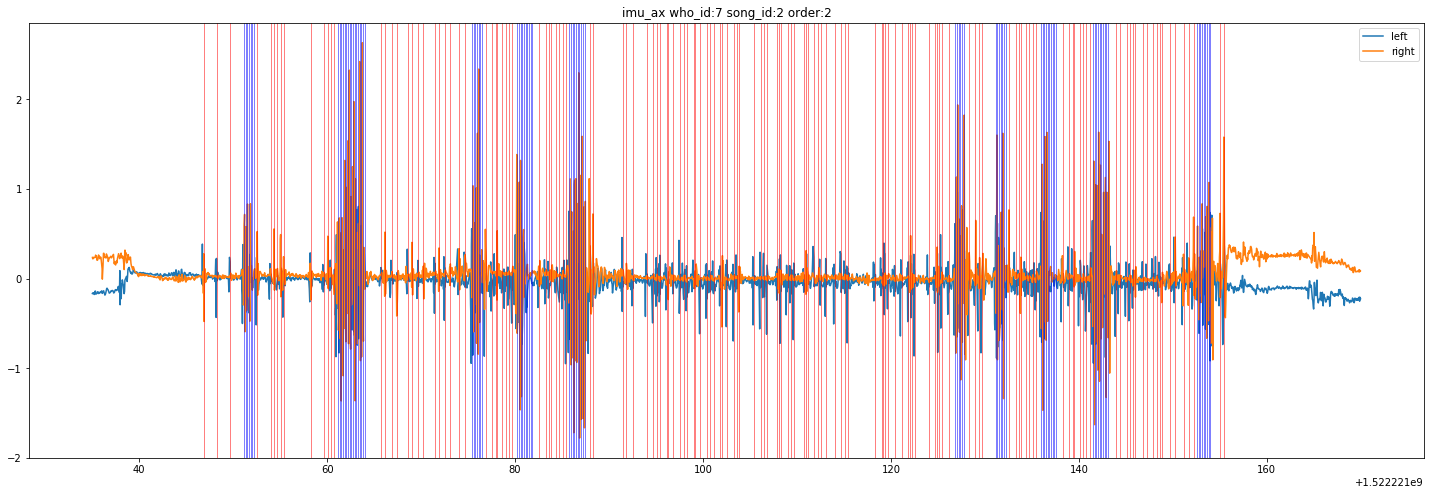

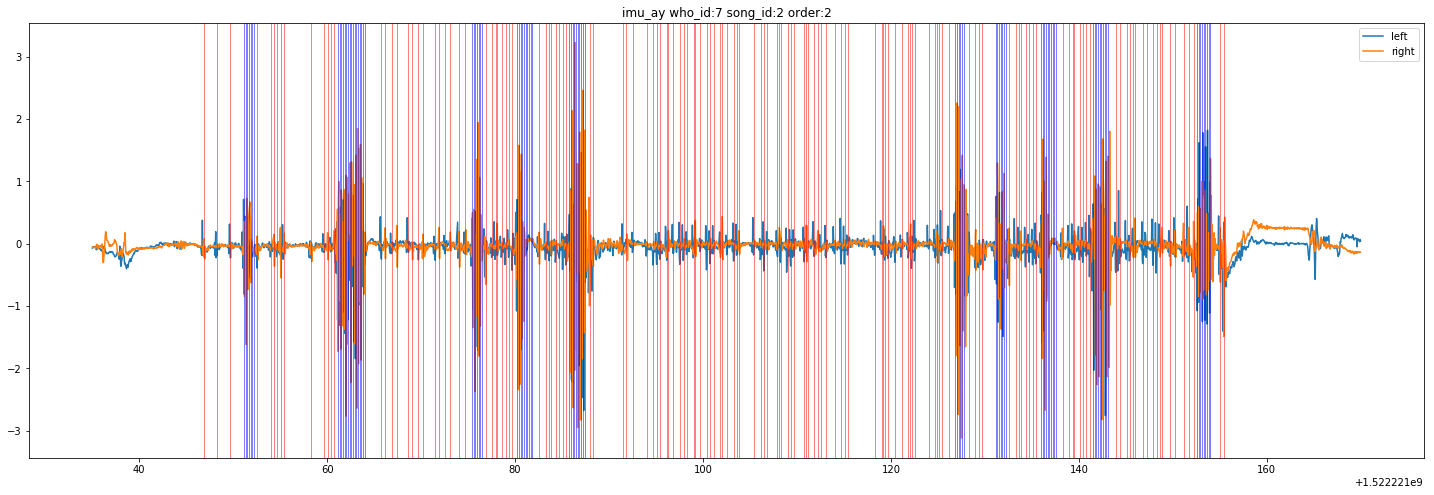

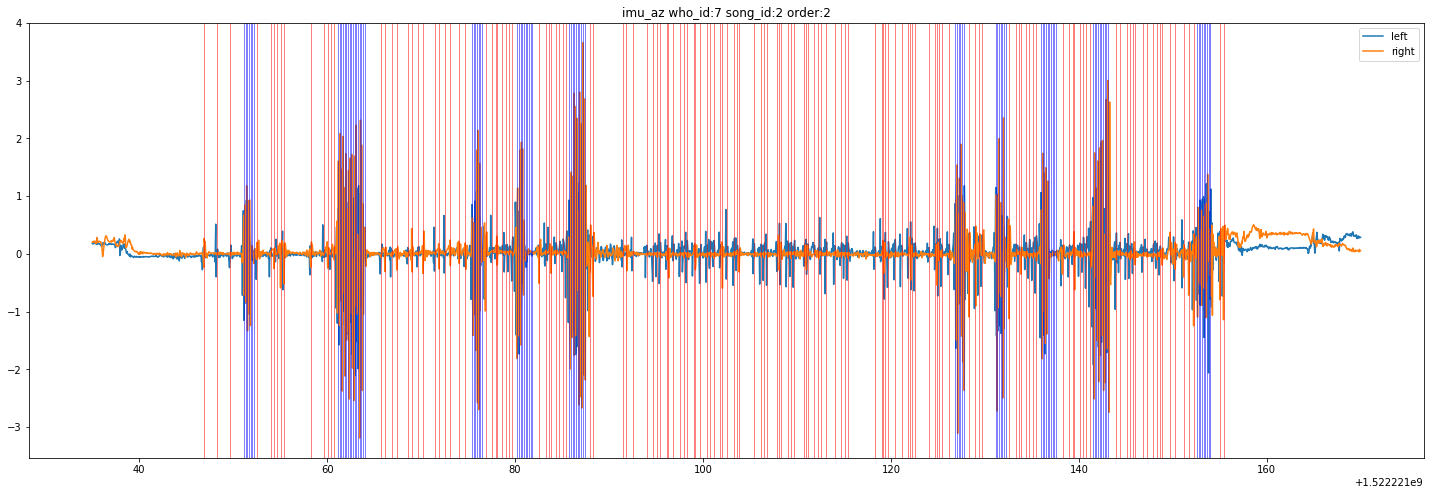

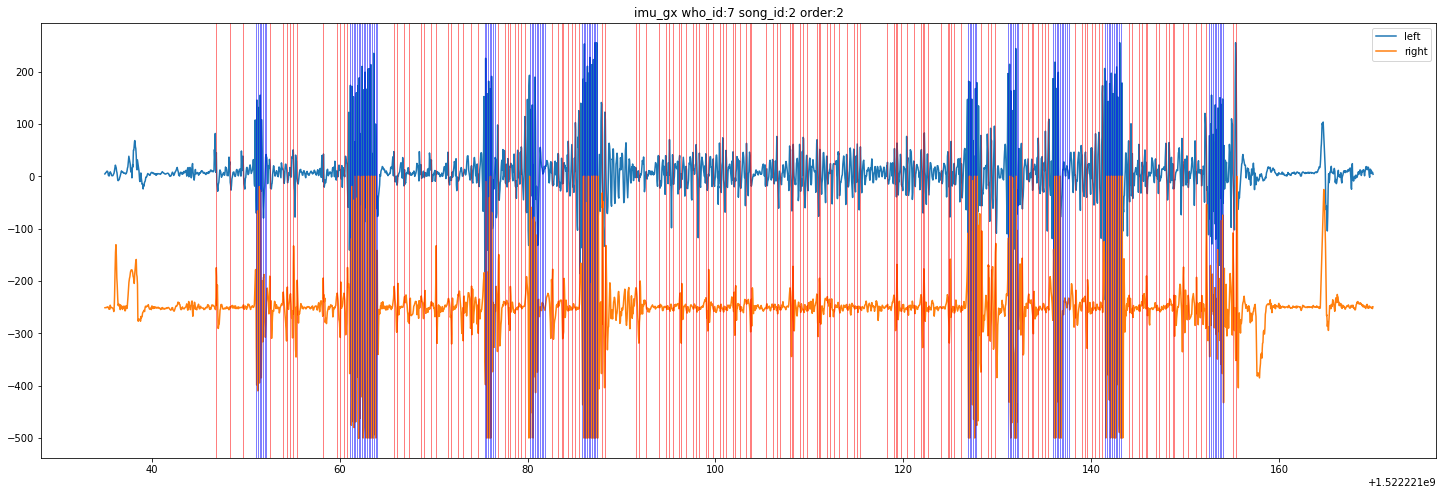

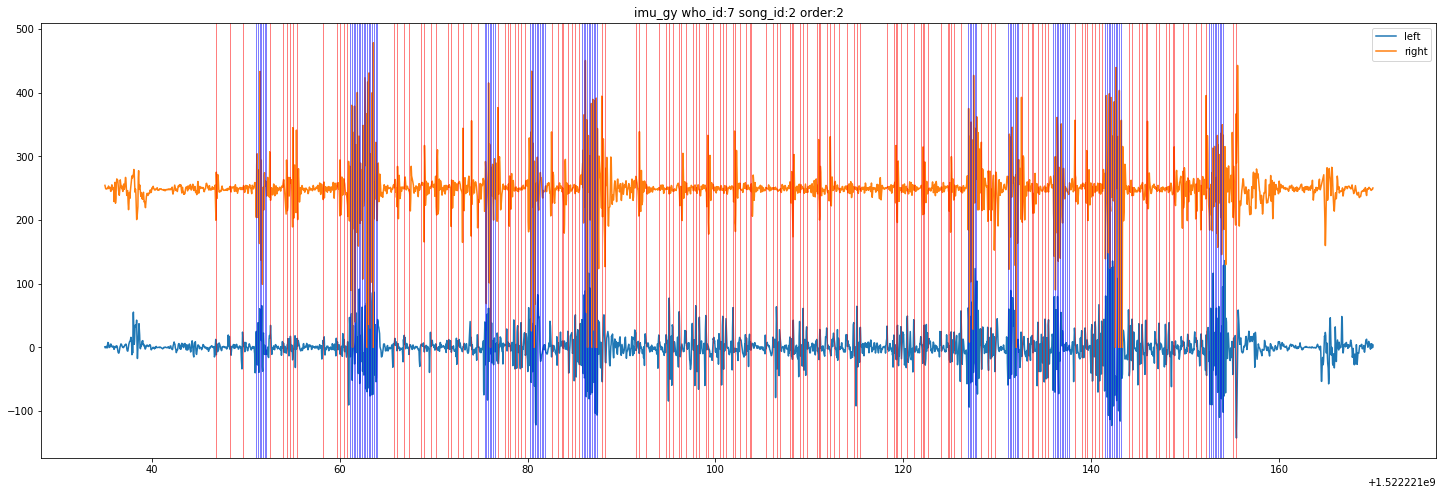

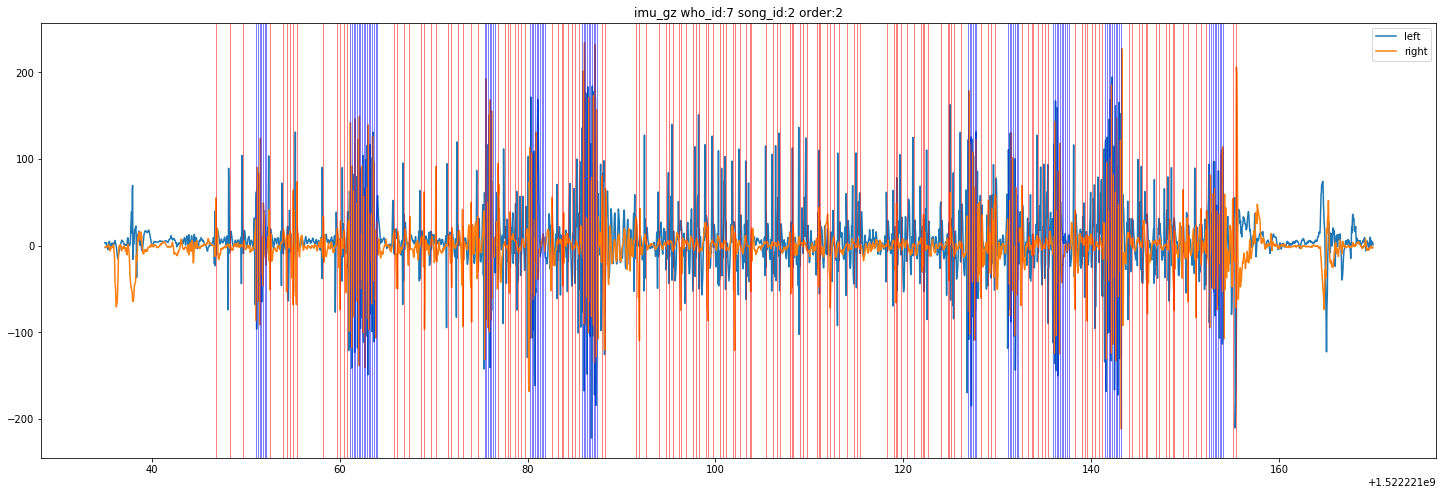

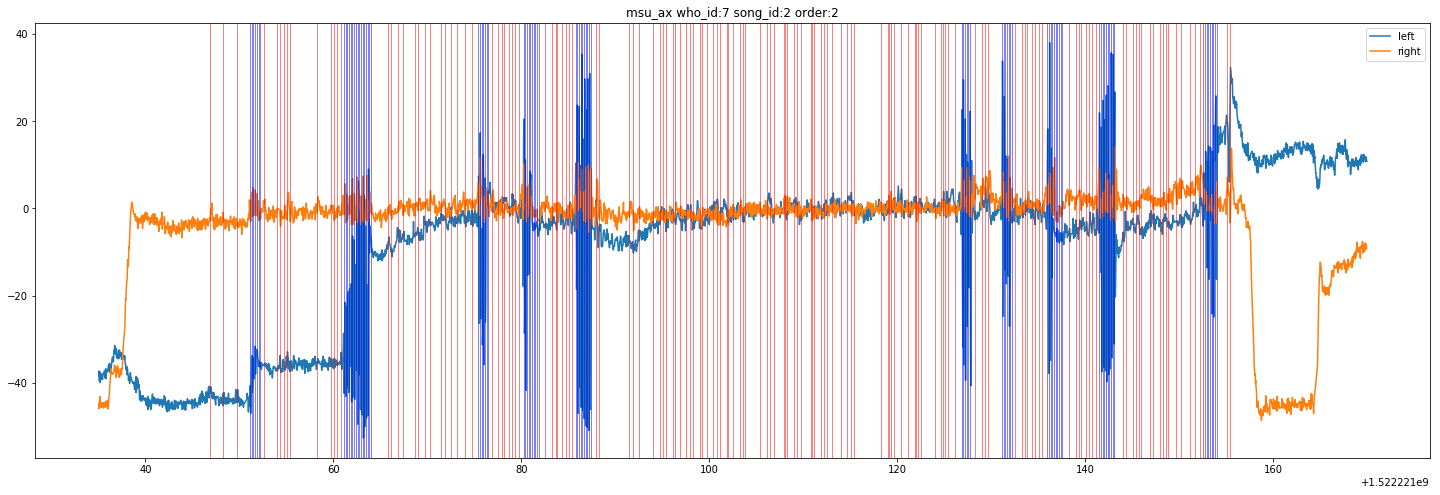

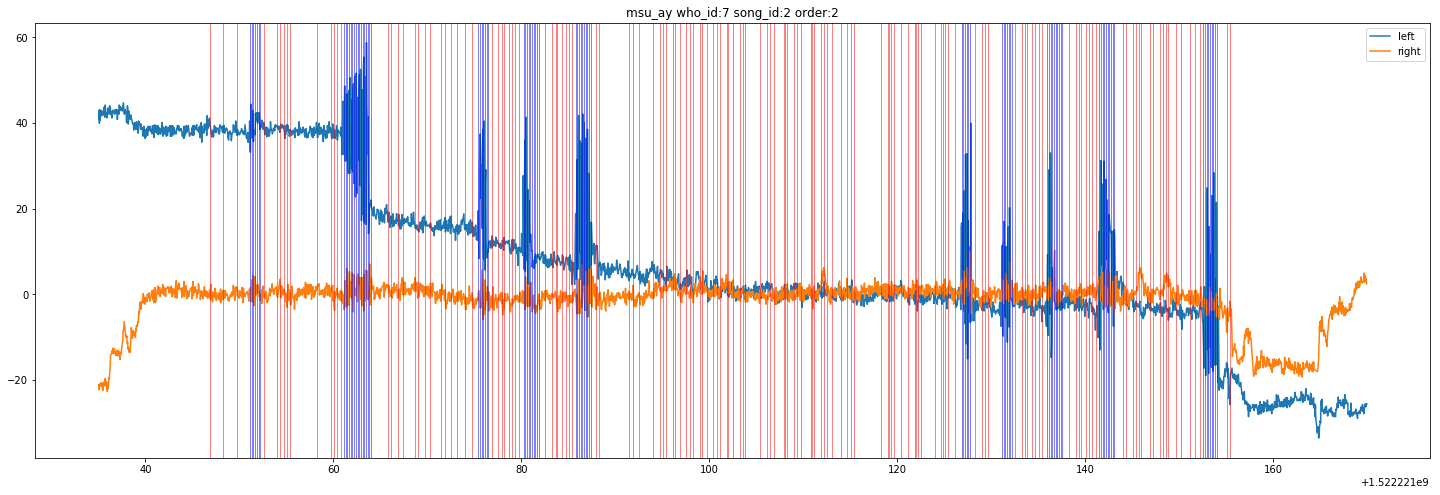

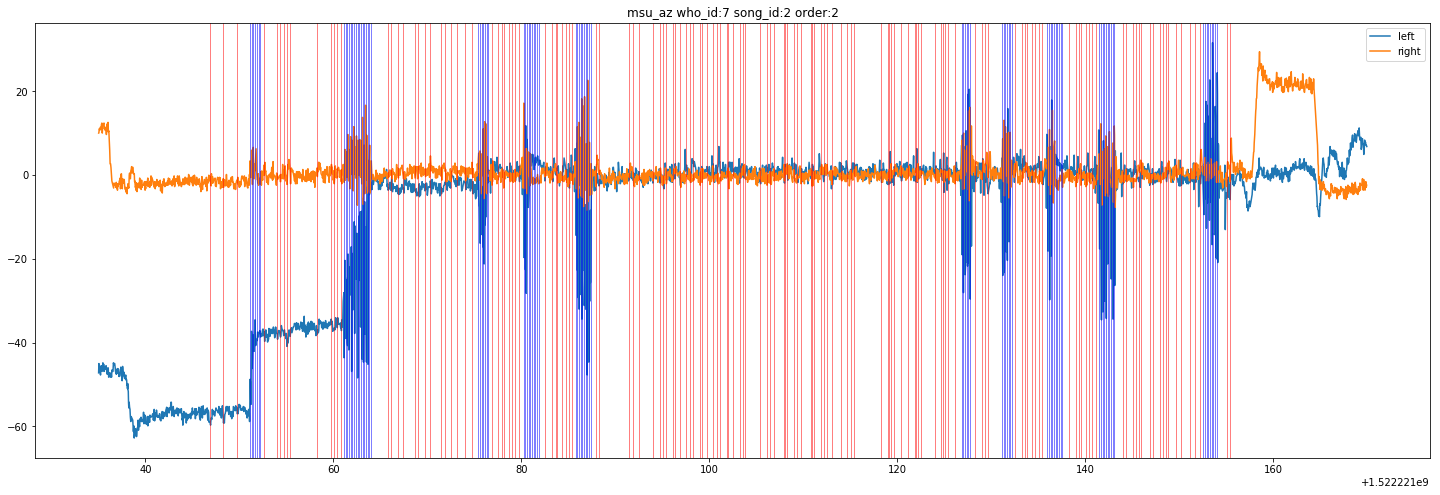

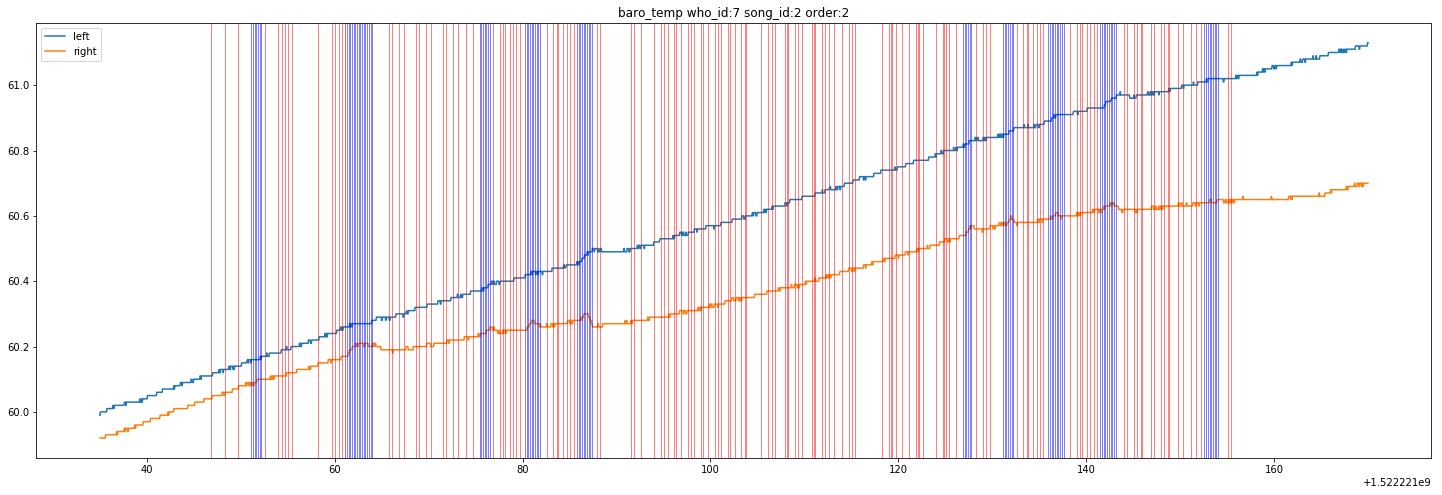

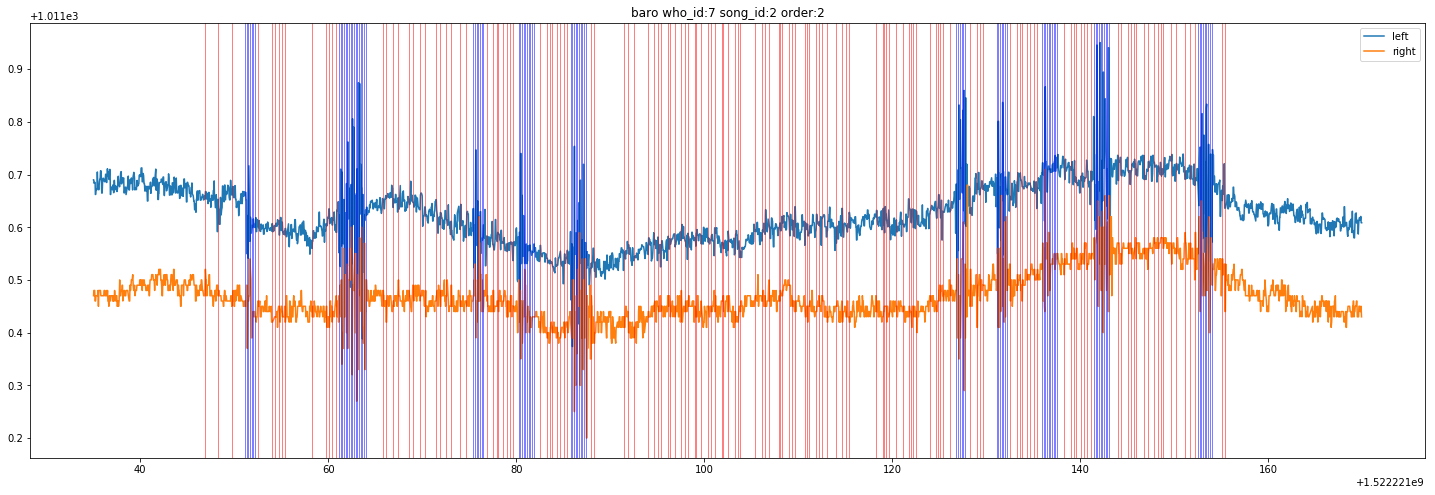

In [6]:
pfs[1].plot_global_event()

In [7]:
# for i in range(len(pfs)):
#     print(pfs[i].primitive_df)
pfs[2].primitive_df

,L_AAI,L_AVI,L_ASMA,L_GAI,L_GVI,L_GSMA,L_AAE,L_ARE,L_MAMI,L_MGMI,...,R_AZCR,R_GZCR,R_AMCR,R_GMCR,R_AXYCORR,R_AYZCORR,R_AZXCORR,R_GXYCORR,R_GYZCORR,R_GZXCORR
0,0.278797,2.485727e-07,0.482000,248.497374,0.862884,254.913500,0.077728,61751.807940,0.278797,248.497374,...,0.333333,0.333333,0.333333,0.333333,0.705693,-0.907154,-0.342030,0.333717,0.973682,0.539780
1,0.265559,3.148117e-05,0.450000,247.017085,0.877255,249.796500,0.070553,61018.317347,0.265559,247.017085,...,0.250000,0.250000,0.250000,0.250000,0.727914,0.960329,0.510502,-0.912111,-0.946249,0.772717
2,0.261198,4.393677e-08,0.449500,247.449375,5.794076,255.040000,0.068224,61236.987108,0.261198,247.449375,...,0.500000,0.500000,0.500000,0.500000,-1.000000,1.000000,-1.000000,-1.000000,1.000000,-1.000000
3,0.254372,1.067240e-05,0.433000,247.919409,0.584703,254.291500,0.064716,61464.618310,0.254372,247.919409,...,0.500000,0.500000,0.500000,0.500000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000
4,0.253337,4.065190e-05,0.433500,248.072409,0.032861,256.261000,0.064220,61539.953151,0.253337,248.072409,...,0.500000,0.500000,0.500000,0.500000,1.000000,1.000000,1.000000,-1.000000,-1.000000,1.000000
5,0.255461,2.390436e-05,0.436000,247.798101,2.162332,255.429000,0.065284,61406.061182,0.255461,247.798101,...,0.500000,0.500000,0.500000,0.500000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000
6,0.247853,7.727677e-06,0.423000,247.309321,3.125021,255.169000,0.061439,61165.025055,0.247853,247.309321,...,0.500000,0.500000,0.500000,0.500000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000
7,0.240948,5.474265e-06,0.411500,243.703485,2.493402,248.829500,0.058061,59393.882076,0.240948,243.703485,...,0.500000,0.500000,0.500000,0.500000,-1.000000,-1.000000,1.000000,-1.000000,1.000000,-1.000000
8,0.231653,2.970995e-04,0.391333,230.766868,16.897504,240.365667,0.053960,53270.245015,0.225666,232.590037,...,0.500000,0.500000,0.500000,0.500000,-1.000000,-1.000000,1.000000,1.000000,-1.000000,-1.000000
9,0.199119,3.149004e-04,0.327333,213.116000,45.716647,226.872000,0.039963,45464.146090,0.196128,213.868241,...,0.500000,0.500000,0.500000,0.500000,-1.000000,-1.000000,1.000000,-1.000000,1.000000,-1.000000


In [8]:
def cutstom_output_cnf_matrix(y, pred_y):
    cnf_matrix = confusion_matrix(y, pred_y)
    
    # Plot normalized confusion matrix
    plt.figure(figsize=(10, 10))
    plot_confusion_matrix(cnf_matrix, classes=[1, 2], normalize=True,
                          title='Normalized confusion matrix')
    plt.show()

[[-0.02155473 -0.24246194  0.09717971 ...  0.50512865  0.92937661
   0.38739626]
 [-0.05725939 -0.24208753  0.03851918 ... -0.84781237 -1.12513689
   0.64140668]
 [-0.06902087 -0.24246439  0.03760261 ... -0.94325836  0.95753956
  -1.29168131]
 ...
 [ 0.27217009 -0.24245924  0.34648697 ... -0.94325836  0.95753956
  -1.29168131]
 [ 0.24939002 -0.24151499  0.3391544  ...  1.22869779  0.95753956
   0.88925077]
 [ 0.30052157 -0.23783593  0.35931896 ... -0.94325836  0.95753956
  -1.29168131]]


100%|██████████| 609/609 [00:52<00:00, 11.67it/s]

let's go centroid=50, C=25.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 609/609 [00:52<00:00, 11.53it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.94594595 0.05405405]
 [0.25806452 0.74193548]]


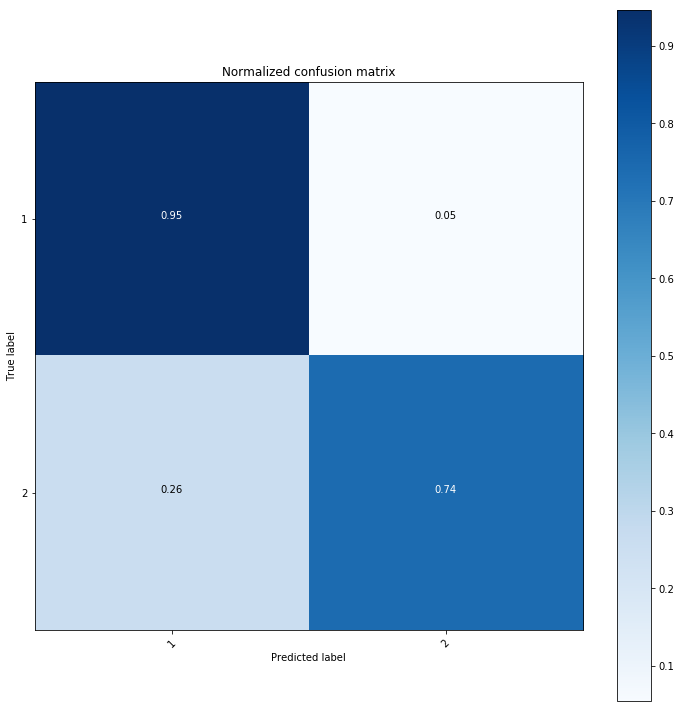

predicting 2 performance


100%|██████████| 609/609 [00:52<00:00, 11.54it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.93918919 0.06081081]
 [0.16129032 0.83870968]]


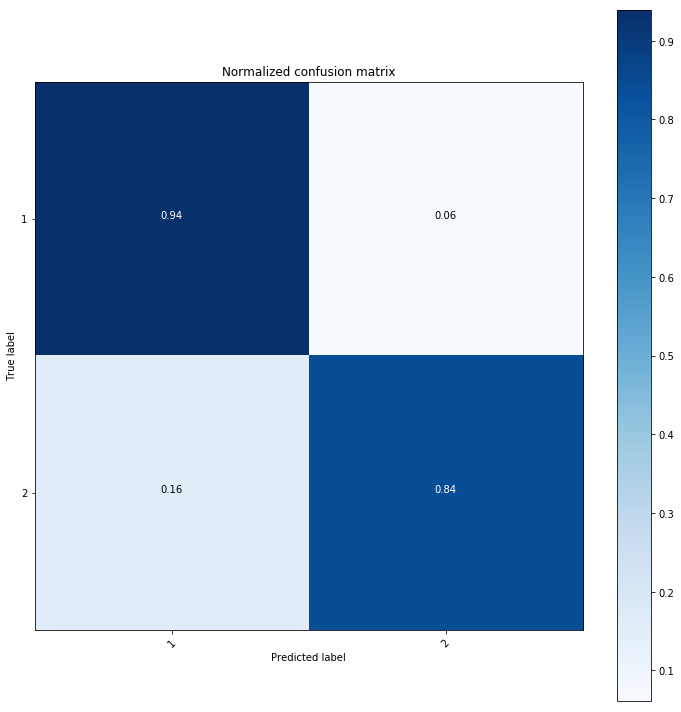

predicting 3 performance


100%|██████████| 609/609 [00:52<00:00, 11.65it/s]


============ prediction arm ============
Normalized confusion matrix
[[1.         0.        ]
 [0.04301075 0.95698925]]


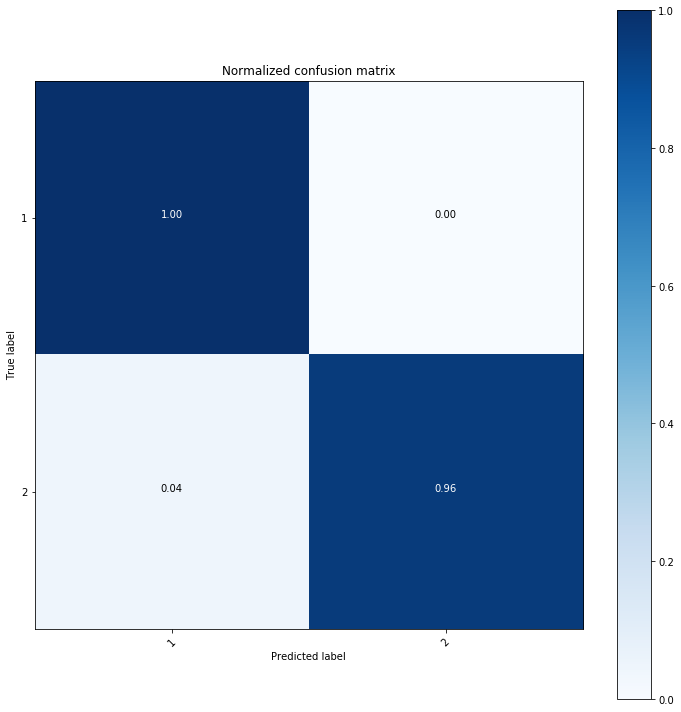

[[-0.02155473 -0.24246194  0.09717971 ...  0.50512865  0.92937661
   0.38739626]
 [-0.05725939 -0.24208753  0.03851918 ... -0.84781237 -1.12513689
   0.64140668]
 [-0.06902087 -0.24246439  0.03760261 ... -0.94325836  0.95753956
  -1.29168131]
 ...
 [ 0.27217009 -0.24245924  0.34648697 ... -0.94325836  0.95753956
  -1.29168131]
 [ 0.24939002 -0.24151499  0.3391544  ...  1.22869779  0.95753956
   0.88925077]
 [ 0.30052157 -0.23783593  0.35931896 ... -0.94325836  0.95753956
  -1.29168131]]


100%|██████████| 609/609 [00:52<00:00, 11.65it/s]

let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 609/609 [00:52<00:00, 11.52it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.91891892 0.08108108]
 [0.24731183 0.75268817]]


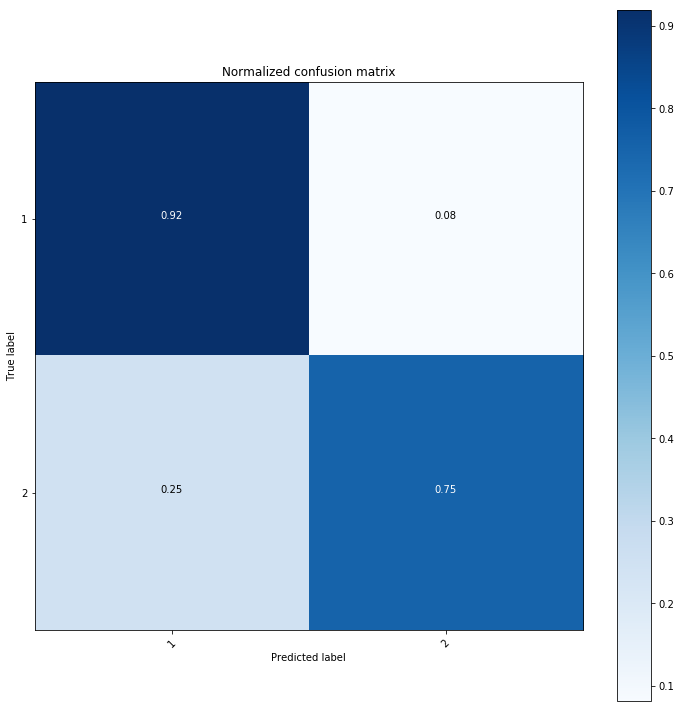

predicting 2 performance


100%|██████████| 609/609 [00:52<00:00, 11.52it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.89864865 0.10135135]
 [0.1827957  0.8172043 ]]


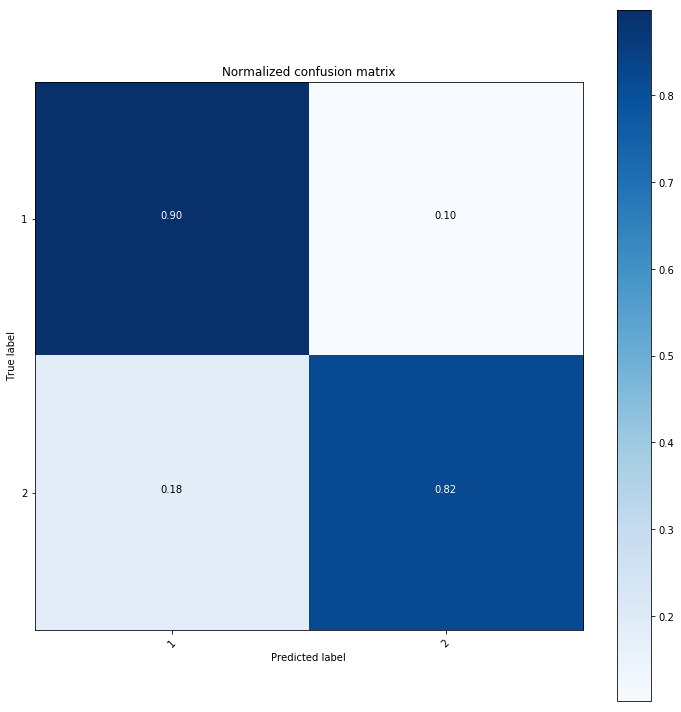

predicting 3 performance


100%|██████████| 609/609 [00:52<00:00, 11.64it/s]


============ prediction arm ============
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


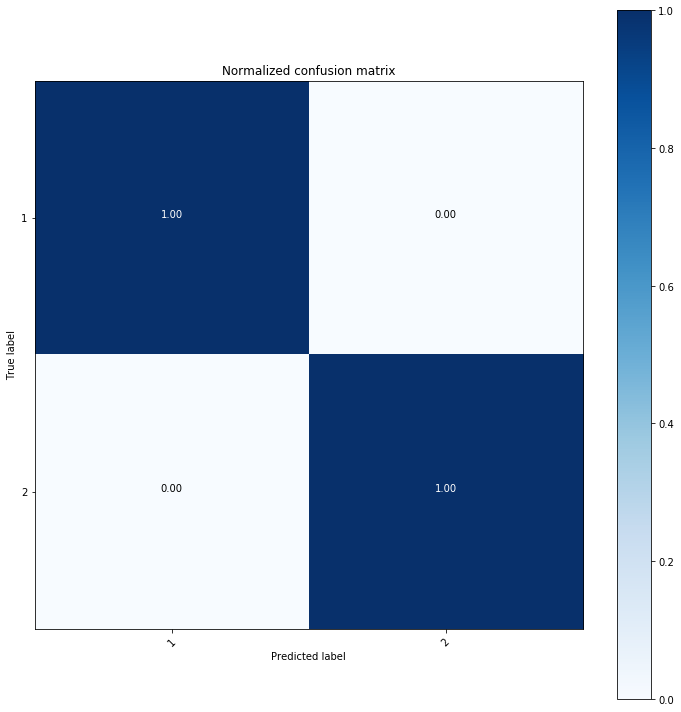

In [9]:
for k in [50]:
    for C in [25, 100]: 
        model = Model(k_centroid=k, tolerance=C)
        model.fit(pfs[TRAIN_ORDER - 1])
        print('let\'s go centroid=%d, C=%.2f @@@@@@@@@@@@@@@' % (k, C))
        for od in range(len(pfs)):
            print('predicting %d performance' % (od + 1))
            pred_y, y = model.predict(pfs[od])
            
            print('============ prediction arm ============')
            cutstom_output_cnf_matrix(y, pred_y)